In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("gemstone.csv")

## EDA

In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
data.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [5]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop("id",axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [9]:
# saprate numerical and catigorical colum
catigorical_features = data.dtypes[data.dtypes == "object"].index
numerical_features = data.dtypes[data.dtypes != "object"].index
print(catigorical_features)
print(numerical_features)

Index(['cut', 'color', 'clarity'], dtype='object')
Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [10]:
data.shape

(193573, 10)

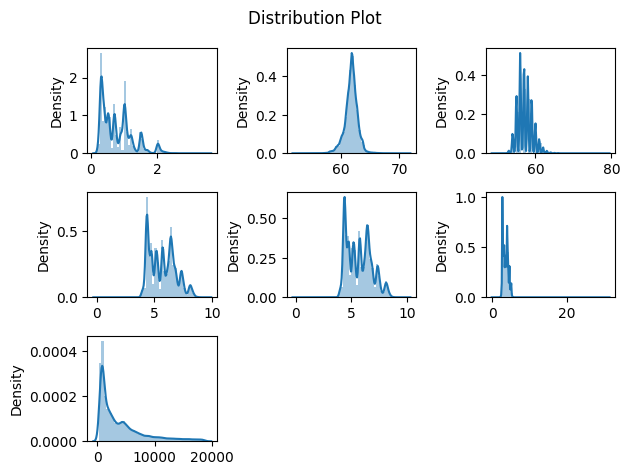

In [11]:
try:
    plt.suptitle("Distribution Plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,3,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

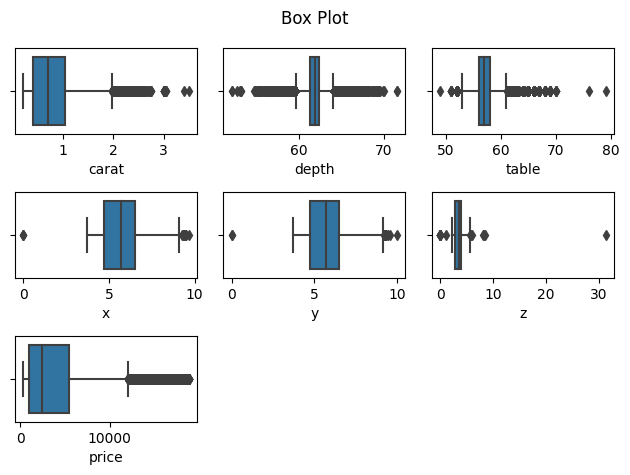

In [12]:
try:
    plt.suptitle("Box Plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,3,i+1)
        sns.boxplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

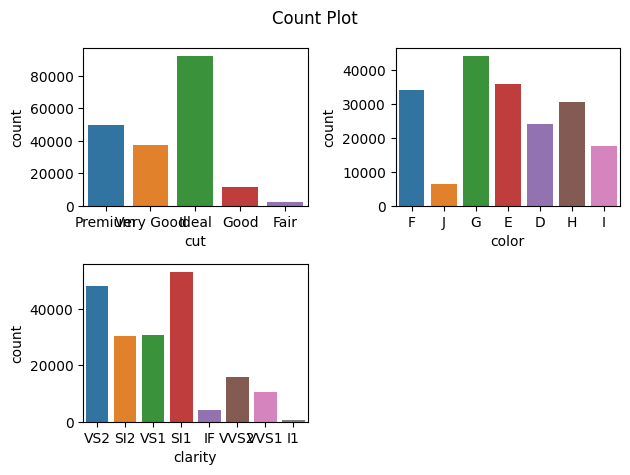

In [13]:
try:
    plt.suptitle("Count Plot")
    for i in range(0,len(catigorical_features)):
        plt.subplot(2,2,i+1)
        sns.countplot(x=data[catigorical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

In [14]:
for i in catigorical_features:
    print(i,data[i].value_counts())
    print("="*60)

cut Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: cut, dtype: int64
color G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: color, dtype: int64
clarity SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: clarity, dtype: int64


In [15]:
for i in catigorical_features:
    print(i,data[i].unique())
    print("="*60)

cut ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
color ['F' 'J' 'G' 'E' 'D' 'H' 'I']
clarity ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


<AxesSubplot:>

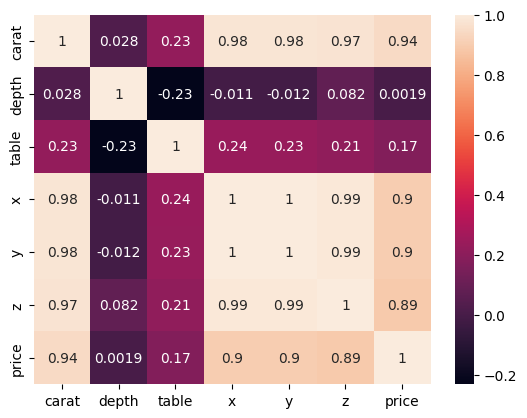

In [16]:
sns.heatmap(data.corr(),annot=True)

In [17]:
sample = data.sample(10000)

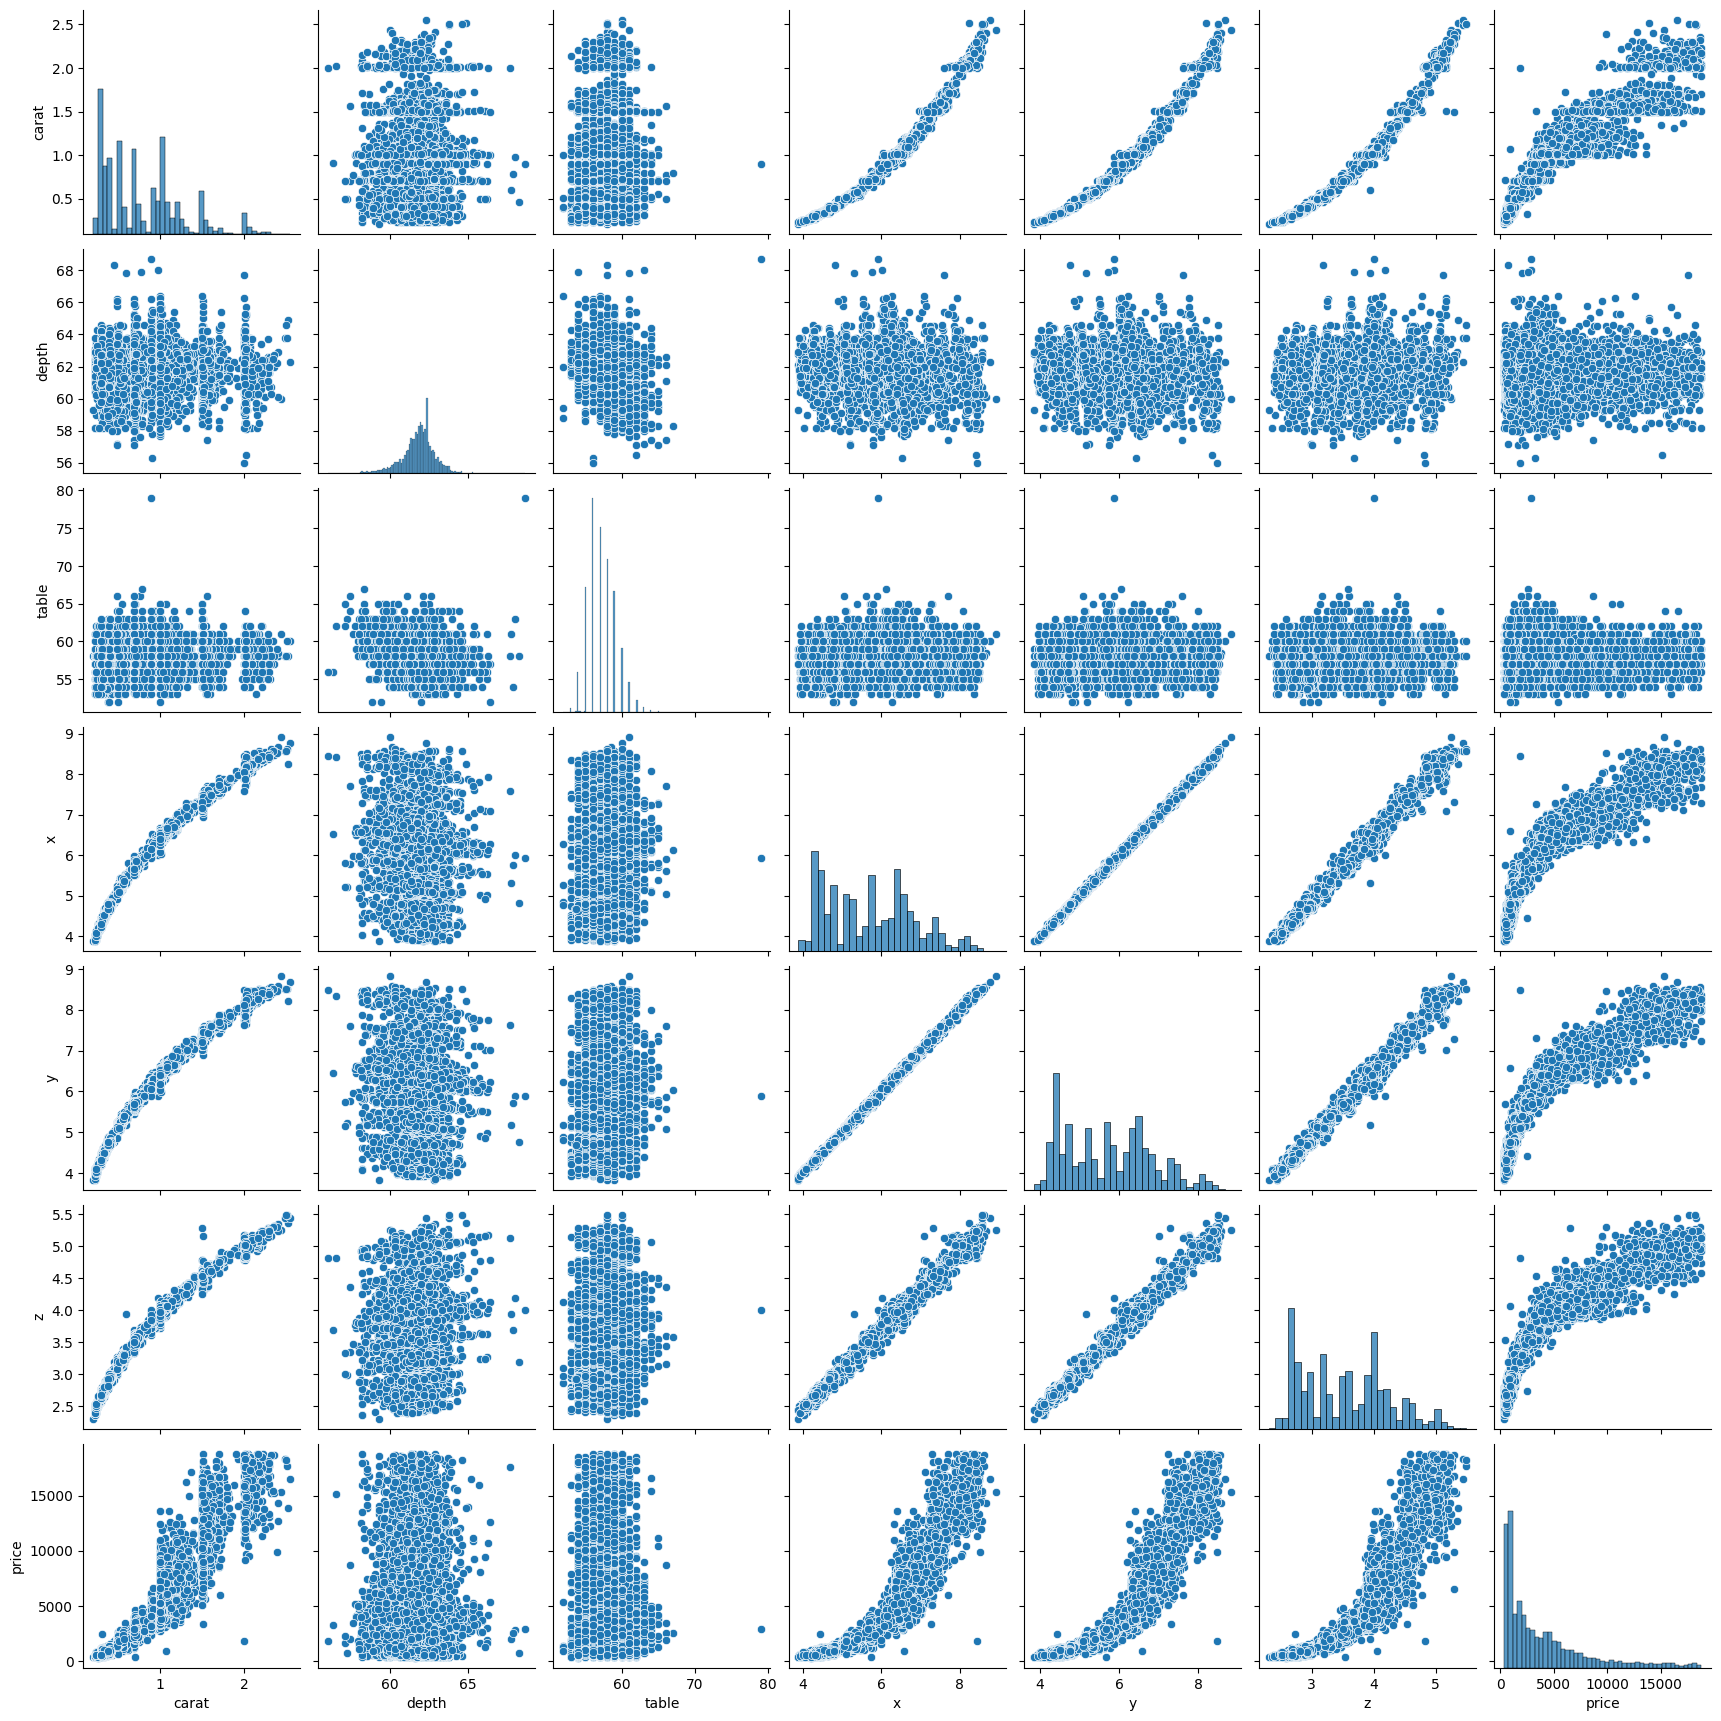

In [18]:
sns.pairplot(sample)

## Model Traning

In [19]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [20]:
## Saprate Independent and Dependent Feature
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [21]:
## saprate numerical and categorical features
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(numerical_features)
print(catigorical_features)

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [22]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [23]:
from sklearn.impute import SimpleImputer # Handel Missing Values
from sklearn.preprocessing import OrdinalEncoder #Ordinal Features
from sklearn.preprocessing import StandardScaler #Handaling Features catigorical
## pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [24]:
# Numerical Pipline

num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())     
    ]
)

# Catigorical Pipline

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinal",OrdinalEncoder(categories=(cut_categories,color_categories,clarity_categories))),
        ("scaler",StandardScaler())
    ]
)

# Transform Colums

preprossor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [25]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135501, 9)
(58072, 9)
(135501,)
(58072,)


In [27]:
# Transform data
X_train = preprossor.fit_transform(X_train)
X_test = preprossor.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [29]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [30]:
## Multiple Model Traning

models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet()
}

model_list = []
r2_list = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    # Make Prediction
    y_pradict = model.predict(X_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_pradict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)

LinearRegression
Model Traning Performance
MSE 102947335.31156845
MAE 67507.5827006748
RMSE 101462.96630375463
R2 93.62906819996049
Ridge
Model Traning Performance
MSE 102948281.01269037
MAE 67510.77629781286
RMSE 101463.43233534452
R2 93.62900967491626
Lesso
Model Traning Performance
MSE 102953315.0650549
MAE 67624.21173665508
RMSE 101465.91302750638
R2 93.62869814082755
Elastic
Model Traning Performance
MSE 235117487.13978744
MAE 106094.32977143009
RMSE 153335.41245902312
R2 85.44967219374031
